# Pense como um Cientista de Dados
## Fundamentos de *Machine Learning* para Resover Problemas
### Capítulo 4. Regressão

### Exemplo de Código para Calcular Correlação

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


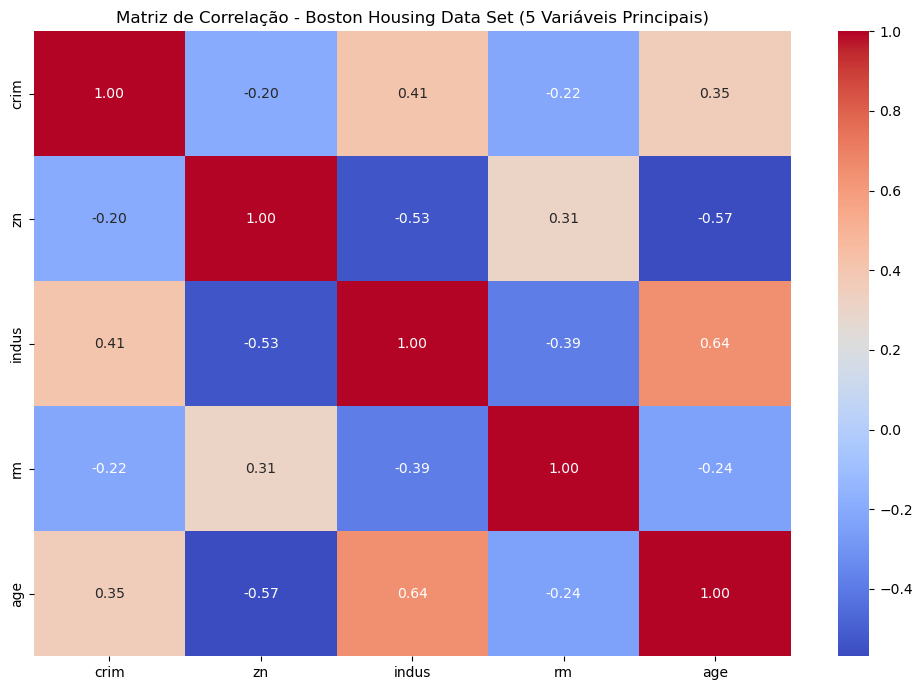

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

# Exibir os nomes das colunas
print(data.columns)

# Selecionar as cinco variáveis principais
data_subset = data[['crim', 'zn', 'indus', 'rm', 'age']]

# Calcular a correlação entre as variáveis
correlation_matrix = data_subset.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - Boston Housing Data Set (5 Variáveis Principais)')
plt.tight_layout()

# Salvar a figura em PNG para Kindle
#plt.savefig('images/correlation_matrix_boston_housing_subset.png', dpi=300)
plt.show()

### Implementação do Modelo de Regressão Linear Simples em Python

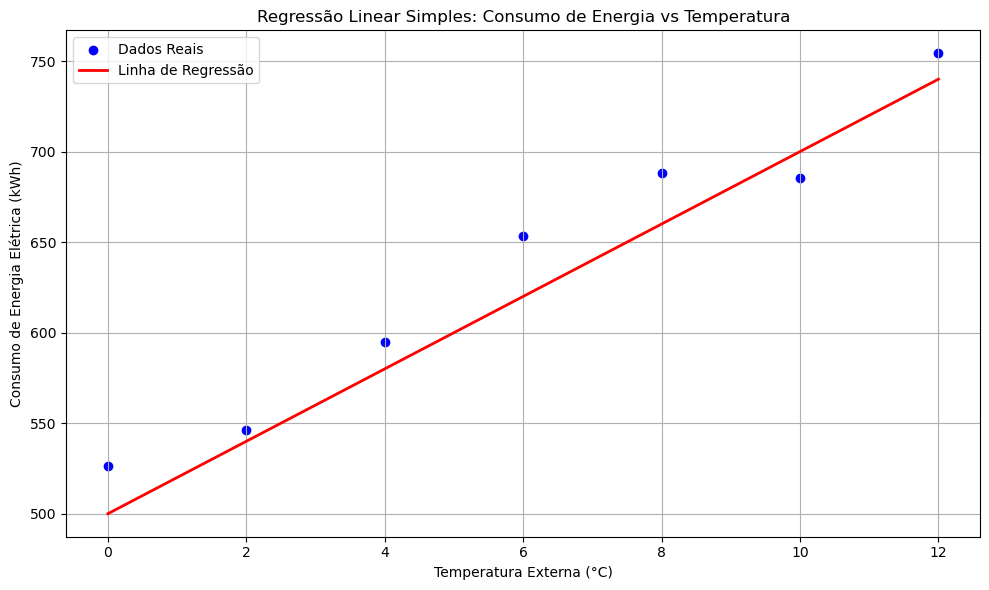

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Dados de exemplo
temperatura = np.array([0, 2, 4, 6, 8, 10, 12])
consumo = np.array([500, 540, 580, 620, 660, 700, 740])

# Gerar pontos de dados com alguma variação
np.random.seed(0)
consumo_real = consumo + np.random.normal(0, 15, size=temperatura.shape)

# Criar a linha de regressão
x = np.linspace(0, 12, 100)
y = 500 + 20 * x

# Plotar os dados e a linha de regressão
plt.figure(figsize=(10, 6))
plt.scatter(temperatura, consumo_real, color='blue', label='Dados Reais')
plt.plot(x, y, color='red', linewidth=2, label='Linha de Regressão')

# Configurações do gráfico
plt.title('Regressão Linear Simples: Consumo de Energia vs Temperatura')
plt.xlabel('Temperatura Externa (°C)')
plt.ylabel('Consumo de Energia Elétrica (kWh)')
plt.legend()
plt.grid(True)

# Ajustar layout
plt.tight_layout()

# Salvar a figura em PNG
#plt.savefig('images/regressao_linear_simples.png', dpi=300)

plt.show()

### Método dos Mínimos Quadrados em **Python** Utilizando um Exemplo Prático

    Temperatura  Consumo_Energia
0            10              200
1            12              230
2            15              275
3            17              240
4            20              220
5            22              300
6            25              280
7            27              350
8            30              310
9            32              350
10           35              370
Coeficiente a (intercepto): 146.12945838837538
Coeficiente b (inclinação): 6.194187582562747


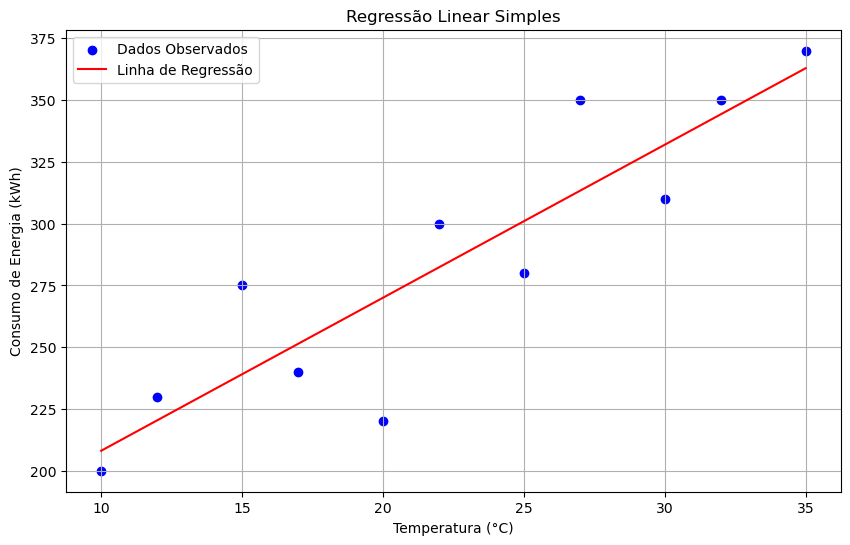

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Criar um conjunto de dados fictício
data = pd.DataFrame({
    'Temperatura': [10, 12, 15, 17, 20, 22, 25, 27, 30, 32, 35],
    'Consumo_Energia': [200, 230, 275, 240, 220, 300, 280, 350, 310, 350, 370]
})

# Visualizar o conjunto de dados
print(data)

# Definir as variáveis independentes e dependentes
X = data['Temperatura'].values
Y = data['Consumo_Energia'].values

# Adicionar uma coluna de uns para representar o coeficiente a (intercepto)
X = np.vstack([np.ones(len(X)), X]).T

# Calcular os coeficientes usando o método dos mínimos quadrados
B = np.linalg.inv(X.T @ X) @ X.T @ Y

# Coeficientes
a, b = B
print(f'Coeficiente a (intercepto): {a}')
print(f'Coeficiente b (inclinação): {b}')

# Predições
Y_pred = X @ B

# Plotar os pontos de dados e a linha de regressão
plt.figure(figsize=(10, 6))
plt.scatter(data['Temperatura'], data['Consumo_Energia'], color='blue', label='Dados Observados')
plt.plot(data['Temperatura'], Y_pred, color='red', label='Linha de Regressão')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Consumo de Energia (kWh)')
plt.title('Regressão Linear Simples')
plt.legend()
plt.grid(True)
plt.show()

## Erro Padrão da Estimativa e o Coeficiente de Determinação para o Exemplo de Regressão Linear Simples

Coeficiente a (intercepto): 146.12945838837538
Coeficiente b (inclinação): 6.194187582562747
Erro Padrão da Estimativa: 27.35929001338841
Coeficiente de Determinação (R^2): 0.7967232361716285


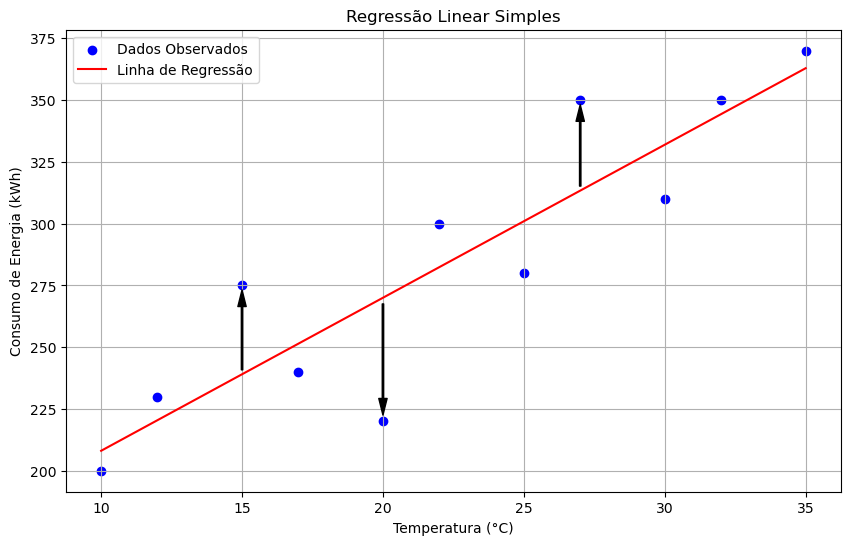

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Criar um conjunto de dados fictício
data = pd.DataFrame({
    'Temperatura': [10, 12, 15, 17, 20, 22, 25, 27, 30, 32, 35],
    'Consumo_Energia': [200, 230, 275, 240, 220, 300, 280, 350, 310, 350, 370]
})

# Definir as variáveis independentes e dependentes
X = data['Temperatura'].values
Y = data['Consumo_Energia'].values

# Adicionar uma coluna de uns para representar o coeficiente a (intercepto)
X = np.vstack([np.ones(len(X)), X]).T

# Calcular os coeficientes usando o método dos mínimos quadrados
B = np.linalg.inv(X.T @ X) @ X.T @ Y

# Coeficientes
a, b = B
print(f'Coeficiente a (intercepto): {a}')
print(f'Coeficiente b (inclinação): {b}')

# Predições
Y_pred = X @ B

# Calcular o erro padrão da estimativa
n = len(Y)
s = np.sqrt(np.sum((Y - Y_pred)**2) / (n - 2))
print(f'Erro Padrão da Estimativa: {s}')

# Calcular o coeficiente de determinação (R^2)
ss_total = np.sum((Y - np.mean(Y))**2)
ss_residual = np.sum((Y - Y_pred)**2)
r_squared = 1 - (ss_residual / ss_total)
print(f'Coeficiente de Determinação (R^2): {r_squared}')

# Plotar os pontos de dados e a linha de regressão
plt.figure(figsize=(10, 6))
plt.scatter(data['Temperatura'], data['Consumo_Energia'], color='blue', label='Dados Observados')
plt.plot(data['Temperatura'], Y_pred, color='red', label='Linha de Regressão')

# Adicionar setas para representar os erros nos pontos especificados
points = [(15, 275), (20, 220), (27, 350)]
for (x, y) in points:
    y_pred = a + b * x
    plt.annotate('', xy=(x, y), xytext=(x, y_pred),
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6))

plt.xlabel('Temperatura (°C)')
plt.ylabel('Consumo de Energia (kWh)')
plt.title('Regressão Linear Simples')
plt.legend()
plt.grid(True)
plt.show()

## Sumário Estatístico Gerado pelo **statsmodels**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Criar um conjunto de dados fictício
data = pd.DataFrame({
    'Temperatura': [10, 12, 15, 17, 20, 22, 25, 27, 30, 32, 35],
    'Consumo_Energia': [200, 230, 275, 240, 220, 300, 280, 350, 310, 350, 370]
})

# Visualizar o conjunto de dados
print(data)

# Definir as variáveis independentes e dependentes
X = data['Temperatura']
Y = data['Consumo_Energia']

# Adicionar a constante para representar o coeficiente a (intercepto)
X = sm.add_constant(X)

# Construir o modelo de regressão
modelo = sm.OLS(Y, X).fit()

# Imprimir o resumo estatístico
print(modelo.summary())

    Temperatura  Consumo_Energia
0            10              200
1            12              230
2            15              275
3            17              240
4            20              220
5            22              300
6            25              280
7            27              350
8            30              310
9            32              350
10           35              370
                            OLS Regression Results                            
Dep. Variable:        Consumo_Energia   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     35.27
Date:                Sat, 03 Aug 2024   Prob (F-statistic):           0.000218
Time:                        13:35:19   Log-Likelihood:                -50.904
No. Observations:                  11   AIC:                             105.8
Df Residuals:                       9   BIC:       

/home/penseemdados/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


# Resolução do Exercício de Regressão Linear Simples
## Parte 1: Cálculo dos Coeficientes
Primeiro, calculamos os coeficientes da regressão linear simples. Para isso, usaremos a média dos valores de *x* (temperatura) e *y* (consumo de energia), juntamente com a fórmula dos mínimos quadrados.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Criar um conjunto de dados fictício
data = pd.DataFrame({
    'temperatura': [10, 12, 15, 17, 20, 22, 25, 27, 30, 32, 35],
    'consumo_energia': [200, 230, 275, 240, 220, 300, 280, 350, 310, 350, 370]
})

# Visualizar o conjunto de dados
print(data)

# Definir as variáveis independentes e dependentes
X = data['temperatura'].values
Y = data['consumo_energia'].values

# Calcular as médias de X e Y
mean_X = np.mean(X)
mean_Y = np.mean(Y)

# Número total de valores
n = len(X)

# Inicializar as variáveis para os cálculos
numerador = 0
denominador = 0

# Loop para calcular numerador e denominador
for i in range(n):
    numerador += (X[i] - mean_X) * (Y[i] - mean_Y)
    denominador += (X[i] - mean_X) ** 2

# Calcular os coeficientes
b = numerador / denominador
a = mean_Y - b * mean_X

# Imprimir os coeficientes
print(f'Coeficiente a (intercepto): {a}')
print(f'Coeficiente b (inclinação): {b}')

    temperatura  consumo_energia
0            10              200
1            12              230
2            15              275
3            17              240
4            20              220
5            22              300
6            25              280
7            27              350
8            30              310
9            32              350
10           35              370
Coeficiente a (intercepto): 146.12945838837513
Coeficiente b (inclinação): 6.194187582562748


## Parte 2: Fazer Previsões
Utilize os coeficientes calculados para fazer previsões. Aqui está a fórmula do modelo de regressão linear simples aplicada a um novo valor de temperatura.

Previsão do consumo de energia para temperatura de 28°C: 319.57 kWh


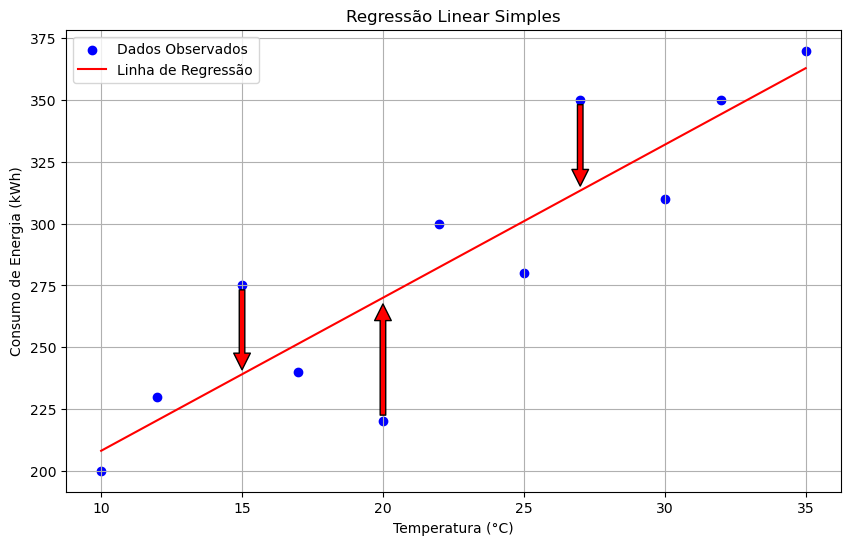

In [7]:
# Definir um novo valor de temperatura para previsão
nova_temperatura = 28

# Calcular a previsão do consumo de energia
predicao = a + b * nova_temperatura
print(f'Previsão do consumo de energia para temperatura de {nova_temperatura}°C: {predicao:.2f} kWh')

# Predições para todos os pontos
Y_pred = a + b * X

# Plotar os pontos de dados e a linha de regressão
plt.figure(figsize=(10, 6))
plt.scatter(data['temperatura'], data['consumo_energia'], color='blue', label='Dados Observados')
plt.plot(data['temperatura'], Y_pred, color='red', label='Linha de Regressão')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Consumo de Energia (kWh)')
plt.title('Regressão Linear Simples')
plt.legend()
plt.grid(True)

# Adicionar setas representando o erro nos pontos (15, 275), (20, 220) e (27, 350)
erro_pts = [(15, 275), (20, 220), (27, 350)]
for pt in erro_pts:
    plt.annotate(
        '', xy=(pt[0], a + b * pt[0]), xytext=(pt[0], pt[1]),
        arrowprops=dict(facecolor='red', shrink=0.05)
    )

plt.show()